In [511]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [512]:
dataset = pd.read_csv(r"/Users/kandy/Downloads/Big Mart Sales Prediction Train.csv")

In [513]:
dataset.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [514]:
dataset.shape

(8523, 12)

In [515]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [516]:
dataset.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [517]:
(dataset['Item_Weight'].isnull().sum()/len(dataset['Item_Weight']))*100

17.165317376510618

In [518]:
(dataset['Outlet_Size'].isnull().sum()/len(dataset['Outlet_Size']))*100

28.27642848762173

In [519]:
dataset["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [520]:
dataset["Item_Type"].nunique()

16

In [521]:
dataset.groupby('Item_Fat_Content')["Item_Outlet_Sales"].size()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Outlet_Sales, dtype: int64

In [522]:
dataset.groupby('Item_Fat_Content')["Item_Outlet_Sales"].mean()

Item_Fat_Content
LF         2073.551928
Low Fat    2164.477336
Regular    2235.186702
low fat    2087.740737
reg        1962.192268
Name: Item_Outlet_Sales, dtype: float64

In [523]:
dataset.shape

(8523, 12)

In [524]:
dataset.groupby('Outlet_Establishment_Year')["Item_Outlet_Sales"].mean()

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

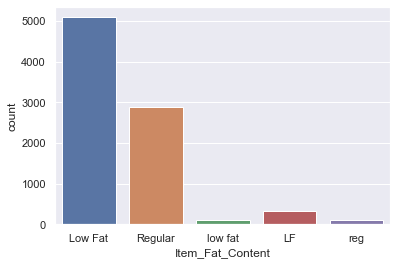

In [525]:
sns.countplot(data=dataset, x='Item_Fat_Content')
plt.show()

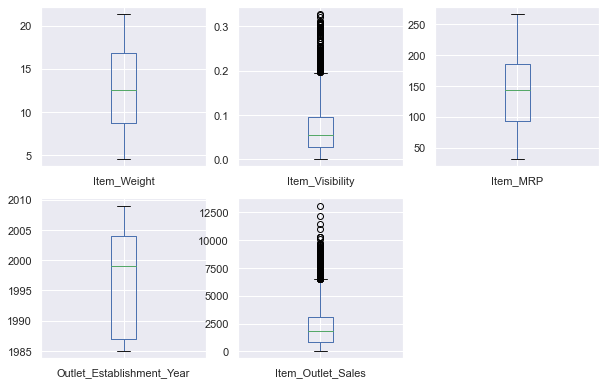

In [526]:
dataset.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10))
plt.show()

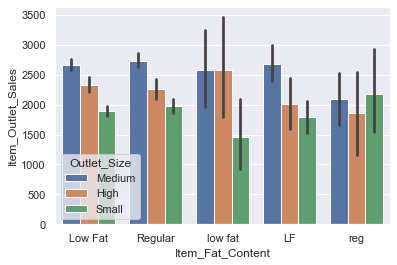

In [527]:
sns.barplot(data=dataset,x='Item_Fat_Content', y='Item_Outlet_Sales',hue='Outlet_Size')
plt.show()

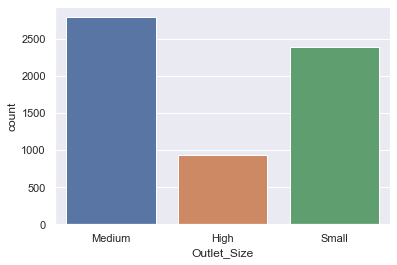

In [528]:
sns.countplot(data=dataset, x='Outlet_Size')
plt.show()

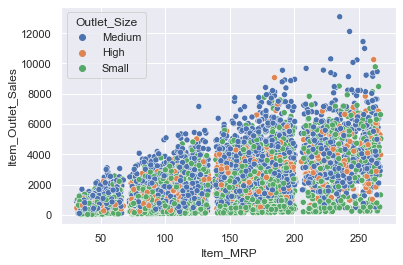

In [529]:
sns.scatterplot(data = dataset, x = 'Item_MRP', y= 'Item_Outlet_Sales', hue = 'Outlet_Size')
plt.show()

In [530]:
#HANDLING MISSING VALUES
mean_weight = dataset["Item_Weight"].mean()

In [531]:
mean_visibility = dataset["Item_Visibility"].mean()

In [532]:
modal_size = dataset["Outlet_Size"].mode()
modal_size[0]

'Medium'

In [533]:
dataset["Item_Weight"] = dataset["Item_Weight"].fillna(mean_weight)

In [534]:
dataset["Outlet_Size"] = dataset["Outlet_Size"].fillna(modal_size[0])

In [535]:
dataset["Item_Visibility"] = dataset["Item_Visibility"].replace(0, mean_visibility)

In [536]:
dataset.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [537]:
dataset.drop(columns=["Outlet_Establishment_Year", "Outlet_Identifier", "Item_Identifier"],axis = 1, inplace = True)

In [538]:
#HANDLING THE OUTLIER IN ITEM_VISIBILITY
dataset["Item_Visibility"].describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [539]:
dataset["Item_Visibility"].mean()

0.07021339063953165

In [540]:
Q1= dataset.Item_Visibility.quantile(0.25)
Q3= dataset.Item_Visibility.quantile(0.75)
Q1,Q3

(0.0330853435, 0.0945852925)

In [541]:
IQR= Q3-Q1
IQR

0.061499949

In [542]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-0.059164579999999994, 0.186835216)

In [543]:
dataset[(dataset.Item_Visibility<lower_limit)|(dataset.Item_Visibility>upper_limit)]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,12.857645,Regular,0.255395,Dairy,196.8794,Small,Tier 1,Grocery Store,780.3176
65,17.700000,LF,0.195068,Snack Foods,185.4266,Medium,Tier 3,Grocery Store,184.4266
83,12.857645,Low Fat,0.293418,Household,194.6136,Small,Tier 1,Grocery Store,583.2408
108,12.857645,low fat,0.278974,Soft Drinks,225.3720,Small,Tier 1,Grocery Store,679.1160
174,17.700000,Low Fat,0.291865,Fruits and Vegetables,115.1834,Medium,Tier 3,Grocery Store,345.5502
...,...,...,...,...,...,...,...,...,...
8292,12.857645,Regular,0.209163,Fruits and Vegetables,179.1976,Small,Tier 1,Grocery Store,543.2928
8345,12.857645,Regular,0.266397,Frozen Foods,215.6218,Small,Tier 1,Grocery Store,641.1654
8371,8.270000,Regular,0.214125,Soft Drinks,183.9924,Medium,Tier 3,Grocery Store,185.0924
8432,14.000000,Regular,0.227261,Frozen Foods,54.3640,Medium,Tier 3,Grocery Store,159.7920


In [544]:
df_no_outlier = dataset[(dataset.Item_Visibility>lower_limit)&(dataset.Item_Visibility<upper_limit)]
df_no_outlier

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.066132,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976


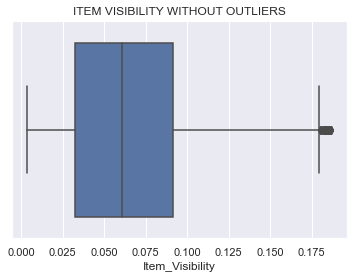

In [545]:
sns.boxplot(data = df_no_outlier, x= "Item_Visibility")
plt.title("ITEM VISIBILITY WITHOUT OUTLIERS")
plt.show()

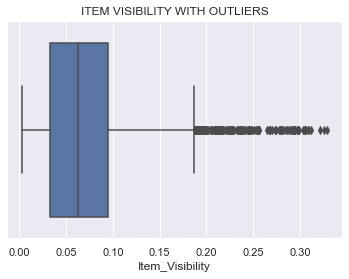

In [546]:
sns.boxplot(data = dataset, x= "Item_Visibility")
plt.title("ITEM VISIBILITY WITH OUTLIERS")
plt.show()

In [547]:
df_no_outlier.shape

(8350, 9)

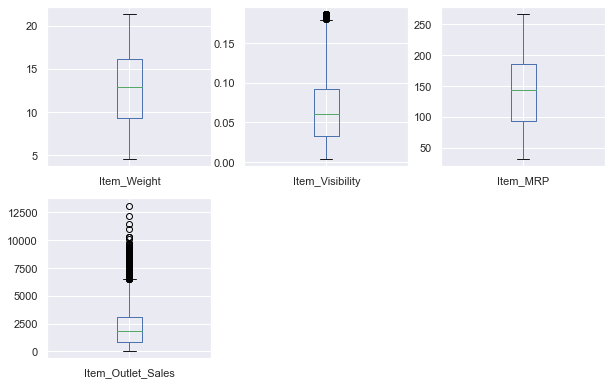

In [548]:
df_no_outlier.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10))
plt.show()

In [549]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [550]:
var_mod = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type', 'Outlet_Type', "Item_Type" ]
lab_enc = LabelEncoder()

for i in var_mod:
    df_no_outlier[i] = lab_enc.fit_transform(df_no_outlier[i])

<ipython-input-550-2c5237d1ed48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outlier[i] = lab_enc.fit_transform(df_no_outlier[i])


In [551]:
tita2 =pd.concat([df_no_outlier,pd.get_dummies(df_no_outlier["Item_Type"], prefix = "Item_Type")],axis = 1)
tita2.drop(["Item_Type"], axis = 1, inplace = True)                                                             
tita3 = pd.concat([tita2,pd.get_dummies(tita2['Item_Fat_Content'], prefix='item_fat')],axis=1)
tita3.drop(['Item_Fat_Content'],axis=1, inplace=True)
tita5 = pd.concat([tita3,pd.get_dummies(tita3['Outlet_Size'], prefix='outlet_size')],axis=1)
tita5.drop(['Outlet_Size'],axis=1, inplace=True)
tita6 = pd.concat([tita5, pd.get_dummies(tita5['Outlet_Location_Type'], prefix = 'outlet_location')], axis = 1)
tita6.drop(['Outlet_Location_Type'], axis =1,inplace = True)
tita7 = pd.concat([tita6, pd.get_dummies(tita6['Outlet_Type'], prefix ='Outlet_Type')], axis = 1)
tita7.drop(['Outlet_Type'], axis = 1, inplace = True)

In [552]:
df_no_outlier.isna().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [553]:
tita7.isna().sum()

Item_Weight          0
Item_Visibility      0
Item_MRP             0
Item_Outlet_Sales    0
Item_Type_0          0
Item_Type_1          0
Item_Type_2          0
Item_Type_3          0
Item_Type_4          0
Item_Type_5          0
Item_Type_6          0
Item_Type_7          0
Item_Type_8          0
Item_Type_9          0
Item_Type_10         0
Item_Type_11         0
Item_Type_12         0
Item_Type_13         0
Item_Type_14         0
Item_Type_15         0
item_fat_0           0
item_fat_1           0
item_fat_2           0
item_fat_3           0
item_fat_4           0
outlet_size_0        0
outlet_size_1        0
outlet_size_2        0
outlet_location_0    0
outlet_location_1    0
outlet_location_2    0
Outlet_Type_0        0
Outlet_Type_1        0
Outlet_Type_2        0
Outlet_Type_3        0
dtype: int64

In [554]:
tita7.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,...,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_0,outlet_location_1,outlet_location_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0.016047,249.8092,3735.1380,0,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,732.3800,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066132,53.8614,994.7052,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [555]:
X=tita7.loc[:, tita7.columns != 'Item_Outlet_Sales']
y=tita7['Item_Outlet_Sales']

In [556]:
X.ndim

2

In [557]:
sc_X = StandardScaler()
scaled_X = sc_X.fit_transform(X)

In [558]:
scaled_X

array([[-0.84102833, -1.19100183,  1.74599662, ...,  0.70609082,
        -0.35338665, -0.35509964],
       [-1.63746611, -1.11515925, -1.48845771, ..., -1.4162484 ,
         2.82976169, -0.35509964],
       [ 1.09115801, -1.17427016,  0.00966887, ...,  0.70609082,
        -0.35338665, -0.35509964],
       ...,
       [-0.53470611, -0.74173315, -0.89701188, ...,  0.70609082,
        -0.35338665, -0.35509964],
       [-1.33350022,  1.84121667, -0.60796202, ..., -1.4162484 ,
         2.82976169, -0.35509964],
       [ 0.45495031, -0.51422267, -1.05196847, ...,  0.70609082,
        -0.35338665, -0.35509964]])

In [559]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state = 42)

In [560]:
from sklearn.linear_model import LinearRegression

In [561]:
model = LinearRegression()

In [562]:
model.fit(X_train,y_train)

LinearRegression()

In [563]:
y_pred= model.predict(X_test)


In [564]:
y_pred

array([2417.3324406, 2343.3324406, 2417.3324406, ..., 5051.2074406,
        841.3324406, 1475.3324406])

In [565]:
from sklearn.metrics import mean_absolute_error


In [566]:
mae=mean_absolute_error(y_test, y_pred) 

In [567]:
mae

834.5039227595526

In [568]:
from sklearn import metrics

In [569]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 834.5039227595526
Mean Squared Error: 1283411.8235839177
Root Mean Squared Error: 1132.877673707059


In [570]:
result = model.score(X_test, y_test)

In [571]:
result

0.5523759269785915

In [572]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.5523759269785915